In [33]:
import tensorflow as tf
import tensorflow_hub as hub

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
from tensorflow.keras.applications import VGG16

In [36]:
import pathlib
data_train = 'D:/07 Skripsi/datates/train'
data_test = 'D:/07 Skripsi/datates/test'

In [37]:
#preprocessing data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
train_generator = train_datagen.flow_from_directory(
            data_train,
            target_size=(150,150),
            class_mode='categorical',
            batch_size=15)
test_generator = test_datagen.flow_from_directory(
            data_test,
            target_size=(150,150),
            class_mode='categorical',
            batch_size=15)

Found 176 images belonging to 8 classes.
Found 174 images belonging to 8 classes.


In [39]:
base_model = VGG16(input_shape = (150,150,3),
                  include_top=False,
                  weights='imagenet')

In [40]:
for layer in base_model.layers:
    layer.trainable=False

In [41]:
from tensorflow.keras import Model
from tensorflow.keras import layers

In [42]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dense(8, activation = 'softmax')(x)

model = Model (base_model.input,x)

In [43]:
model.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [44]:
history = model.fit(
        train_generator,
        epochs = 25,
        steps_per_epoch=11,
        validation_data = test_generator,
        verbose = 1,
        validation_steps=11)

Epoch 1/25
11/11 [==============================] - 89s 8s/step - loss: 2.0764 - accuracy: 0.2788 - val_loss: 1.3880 - val_accuracy: 0.5455
Epoch 2/25
11/11 [==============================] - 83s 8s/step - loss: 0.9490 - accuracy: 0.7267 - val_loss: 1.1267 - val_accuracy: 0.6000
Epoch 3/25
11/11 [==============================] - 82s 8s/step - loss: 0.5514 - accuracy: 0.8199 - val_loss: 1.1299 - val_accuracy: 0.5758
Epoch 4/25
11/11 [==============================] - 84s 8s/step - loss: 0.3918 - accuracy: 0.9006 - val_loss: 1.0448 - val_accuracy: 0.6727
Epoch 5/25
11/11 [==============================] - 84s 8s/step - loss: 0.2377 - accuracy: 0.9627 - val_loss: 0.9480 - val_accuracy: 0.6364
Epoch 6/25
11/11 [==============================] - 85s 8s/step - loss: 0.1915 - accuracy: 0.9627 - val_loss: 0.9958 - val_accuracy: 0.6667
Epoch 7/25
11/11 [==============================] - 81s 8s/step - loss: 0.2140 - accuracy: 0.9317 - val_loss: 1.1262 - val_accuracy: 0.6182
Epoch 8/25
11/11 [==

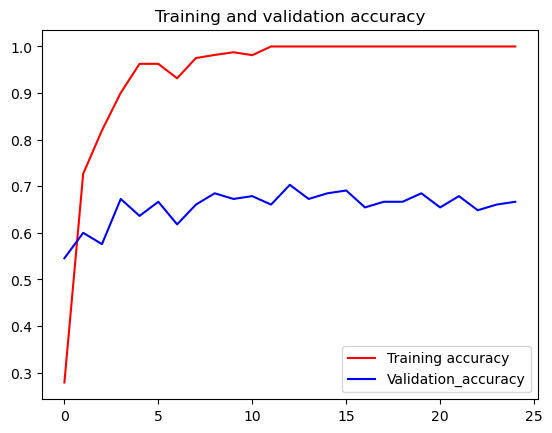

<Figure size 640x480 with 0 Axes>

In [45]:
#plot the result 
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
1